# PUI 3-d homework, assignment 1.

In [1]:
# Importing the libraries

__author__ = 'Ruben Hambardzumyan, based on the skeleton notebook created by Dr. Federica Bianco'

from __future__ import print_function
from scipy.stats import norm as nm # importing the norm function from SciPy results in a conflict with pylab, 
                                   # thus, it is imported as nm
import numpy as np
import pylab as pl
import seaborn


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
mean = 100 # Choosing the mean

# 1. Chi-square distribution

In [3]:
df = mean # Specifying the number of degrees of freedom

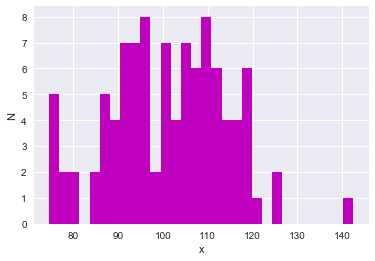

In [4]:
# Creating the dictionary to host the distributions

md = {}

md['chisq'] = np.random.chisquare(df, size=100)

# md now is a dictionary with one object: an array by the key 'chisq'

pl.hist(md['chisq'], bins = 30, FaceColor = 'm')
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution: df = 100, N=100

In [5]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 101.08, standard deviation: 13.00


In [6]:
# Generating samples of different sizes

chisq = (2000 / (np.array(range(1, 100)))).astype(int)
print(chisq, chisq.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


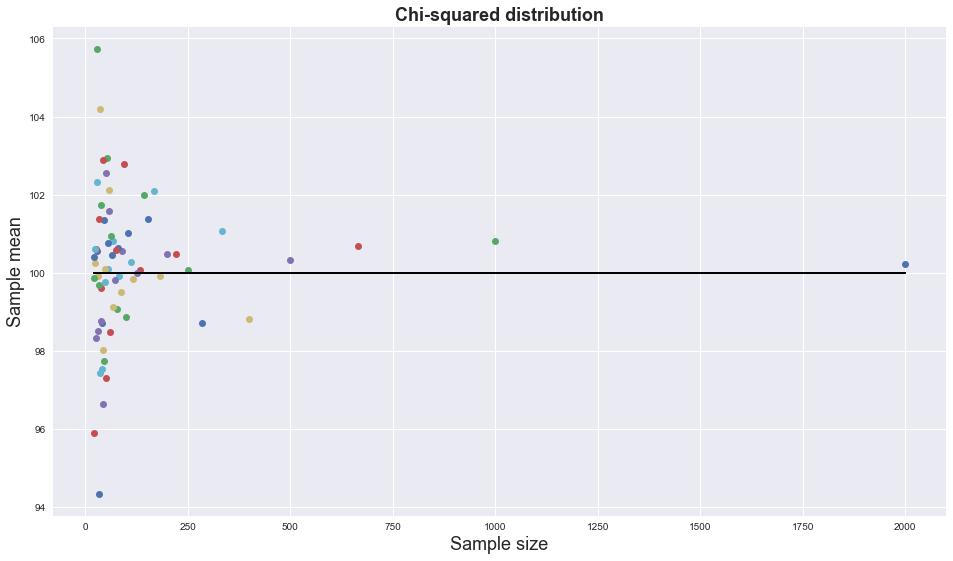

In [7]:
# Empty dictionaries for filling the chi-squares and the means

md['chisq'] = {}

# Filling in the chi-squares

for i in chisq:
    md['chisq'][i] = np.random.chisquare(df, size=i)

# Plotting the distribution and filling in the means

md['chisq']['means'] = {}
chisqMeanN = pl.figure(figsize=(16,9)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        chisqMeanN.plot(nn, md['chisq']['means'][nn], 'o')
        chisqMeanN.set_xlabel('Sample size', fontsize=18)
        chisqMeanN.set_ylabel('Sample mean', fontsize=18)
        chisqMeanN.set_title('Chi-squared distribution', fontsize=18, weight='bold')
        chisqMeanN.plot([min(chisq), max(chisq)], [df, df], 'k')

## Figure 2: Chi-square distribution of sample sizes and sample means. According to the law of large numbers, the more is the number of observations, the closer is the result of those observations to the expected value. In the example above, the means for samples which sizes are more than ~270 are the closest to the expected mean.

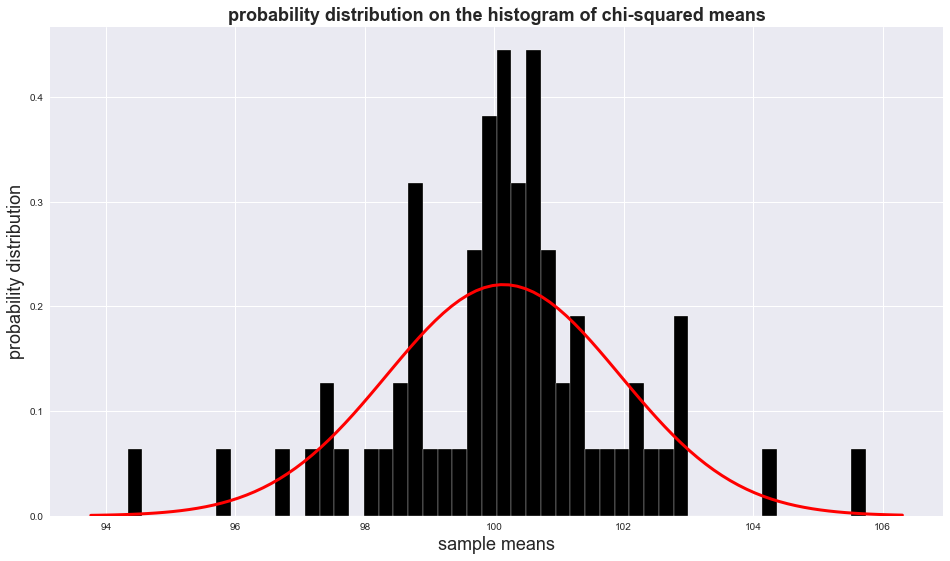

In [8]:
# Creating a histogram for all means

meansChisq = list(md['chisq']['means'].values())

# Creating a mean and a standard deviation to plot the Gaussian function

meanOfMeans = np.mean(meansChisq)
stdOfMeans = np.std(meansChisq)

# plotting the histogram of means

pl.figure(figsize=(16, 9))
pl.hist(meansChisq, bins=50, FaceColor='black', EdgeColor='white', normed=True)

# setting up parameters of the Gaussian function 

xmin, xmax = pl.xlim()
x = np.linspace(xmin, xmax, mean)
gaussian = nm.pdf(x, meanOfMeans, stdOfMeans) # probability distribution function for the mean of means and
                                              # the standard deviation of means

# plotting the Gaussian function on top of the histogram of means
pl.plot(x, gaussian, 'r', linewidth=3)
pl.xlabel('sample means', fontsize=18)
pl.ylabel('probability distribution', fontsize=18)
pl.title('probability distribution on the histogram of chi-squared means', fontsize=18, weight='bold')
pl.show()

## Figure 3: The figure above shows the probability distribution on the histogram of all means of chi-square distribution

# 2. Normal distribution

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


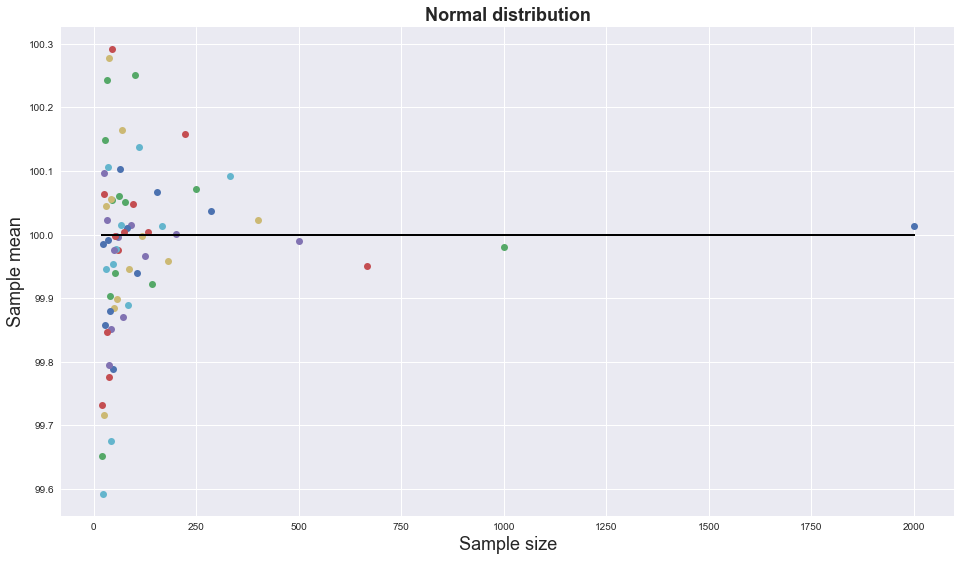

In [9]:
norm = (2000 / (np.array(range(1, 100)))).astype(int)
print(norm, norm.shape)

md['norm'] = {}

# Filling in the normal distributions

for i in norm:
    md['norm'][i] = np.random.normal(mean, size=i)

# Plotting the distribution and filling in the means

md['norm']['means'] = {}
normMeanN = pl.figure(figsize=(16,9)).add_subplot(111)

for nn in md['norm']:
    if not type(nn) == str:
        md['norm']['means'][nn] = md['norm'][nn].mean()
        normMeanN.plot(nn, md['norm']['means'][nn], 'o')
        normMeanN.set_xlabel('Sample size', fontsize=18)
        normMeanN.set_ylabel('Sample mean', fontsize=18)
        normMeanN.set_title('Normal distribution', fontsize=18, weight='bold')
        normMeanN.plot([min(norm), max(norm)], [mean, mean], 'k')

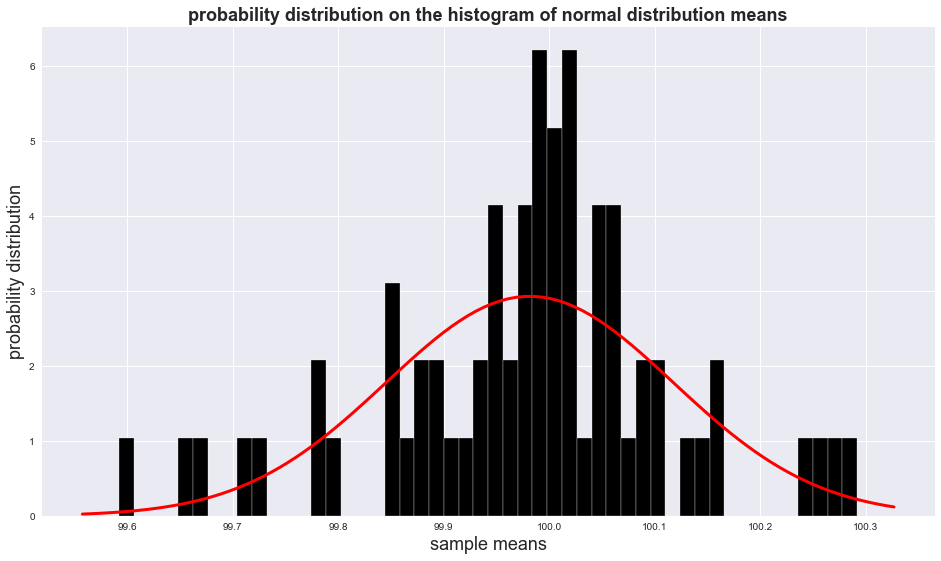

In [10]:
# Creating a histogram for all means

meansNorm = list(md['norm']['means'].values())

# Creating a mean and a standard deviation to plot the Gaussian function

meanOfMeansNorm = np.mean(meansNorm)
stdOfMeansNorm = np.std(meansNorm)

# plotting the histogram of means

pl.figure(figsize=(16, 9))
pl.hist(meansNorm, bins=50, FaceColor='black', EdgeColor='white', normed=True)

# setting up parameters of the Gaussian function 

xmin, xmax = pl.xlim()
x = np.linspace(xmin, xmax, mean)
gaussian = nm.pdf(x, meanOfMeansNorm, stdOfMeansNorm) # probability distribution function for the mean of means and
                                                      # the standard deviation of means

# plotting the Gaussian function on top of the histogram of means

pl.plot(x, gaussian, 'r', linewidth=3)
pl.xlabel('sample means', fontsize=18)
pl.ylabel('probability distribution', fontsize=18)
pl.title('probability distribution on the histogram of normal distribution means', fontsize=18, weight='bold')
pl.show()

## Figure 4: The figure above shows the probability distribution on the histogram of all means of normal distribution.

# 3. Poisson distribution

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


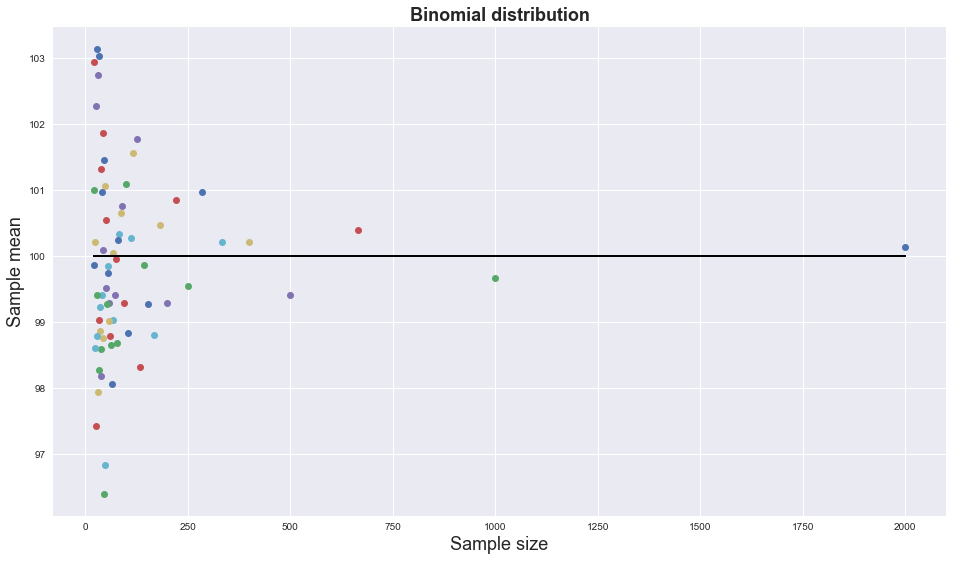

In [11]:
pois = (2000 / (np.array(range(1, 100)))).astype(int)
print(pois, pois.shape)

md['pois'] = {}

# Filling in the poisson distribution

for i in pois:
    md['pois'][i] = np.random.poisson(mean, size=i)

# Plotting the distribution and filling in the means

md['pois']['means'] = {}
poisNormN = pl.figure(figsize=(16,9)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        poisNormN.plot(nn, md['pois']['means'][nn], 'o')
        poisNormN.set_xlabel('Sample size', fontsize=18)
        poisNormN.set_ylabel('Sample mean', fontsize=18)
        poisNormN.set_title('Binomial distribution', fontsize=18, weight='bold')
        poisNormN.plot([min(norm), max(norm)], [mean, mean], 'k')

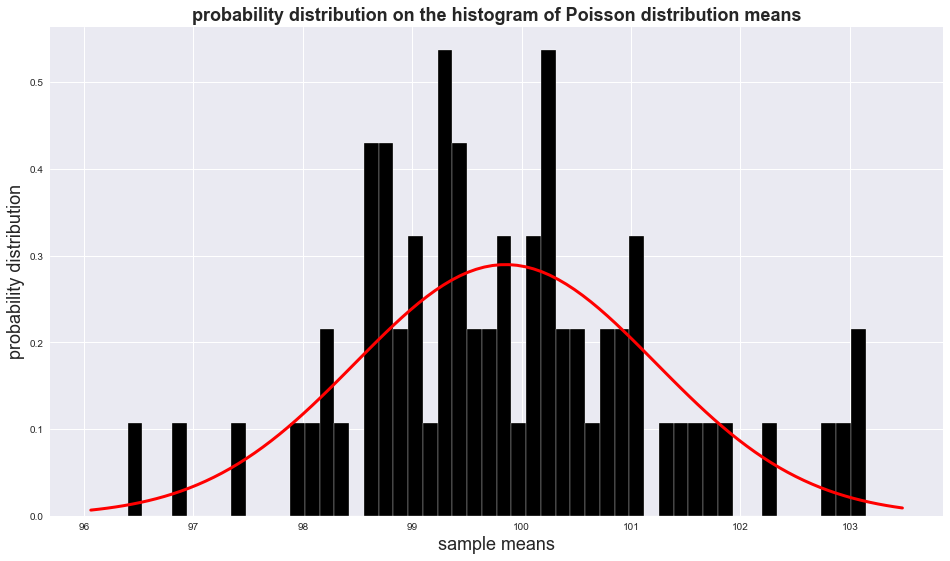

In [12]:
# Creating a histogram for all means

meansPois = list(md['pois']['means'].values())

# Creating a mean and a standard deviation to plot the Gaussian function

meanOfMeansPois = np.mean(meansPois)
stdOfMeansPois = np.std(meansPois)

# plotting the histogram of means

pl.figure(figsize=(16, 9))
pl.hist(meansPois, bins=50, FaceColor='black', EdgeColor='white', normed=True)

# setting up parameters of the Gaussian function 

xmin, xmax = pl.xlim()
x = np.linspace(xmin, xmax, mean)
gaussian = nm.pdf(x, meanOfMeansPois, stdOfMeansPois) # probability distribution function for the mean of means and
                                                      # the standard deviation of means

# plotting the Gaussian function on top of the histogram of means

pl.plot(x, gaussian, 'r', linewidth=3)
pl.xlabel('sample means', fontsize=18)
pl.ylabel('probability distribution', fontsize=18)
pl.title('probability distribution on the histogram of Poisson distribution means', fontsize=18, weight='bold')
pl.show()

## Figure 5: The figure above shows the probability distribution on the histogram of all means of Poisson distribution.

# 4. Binomial distribution

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


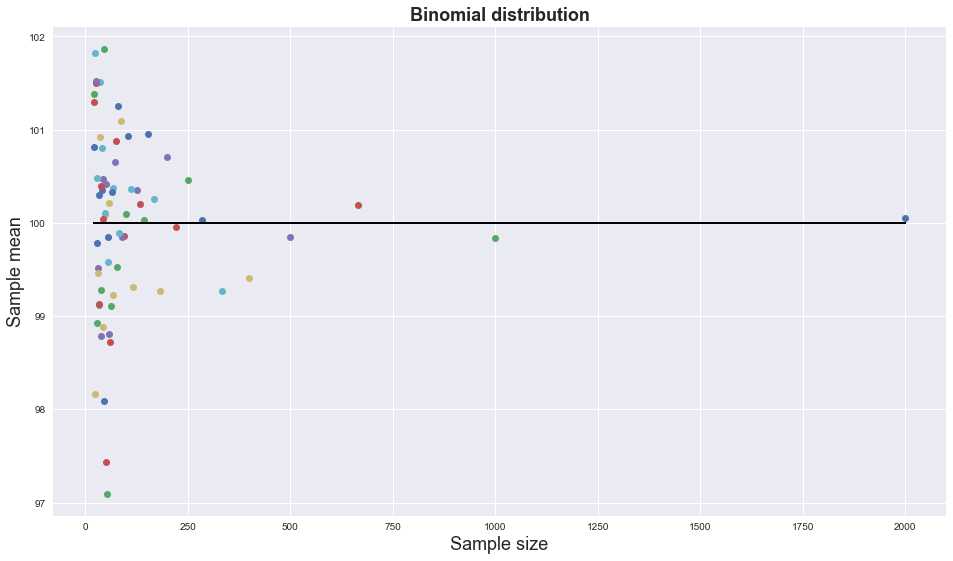

In [13]:
binom = (2000 / (np.array(range(1, 100)))).astype(int)
print(pois, pois.shape)

md['binom'] = {}

# Filling in the binomial distribution

for i in binom:
    md['binom'][i] = np.random.binomial(mean/0.5, 0.5, size=i)

# Plotting the distribution and filling in the means

md['binom']['means'] = {}
binomNormN = pl.figure(figsize=(16,9)).add_subplot(111)

for nn in md['binom']:
    if not type(nn) == str:
        md['binom']['means'][nn] = md['binom'][nn].mean()
        binomNormN.plot(nn, md['binom']['means'][nn], 'o')
        binomNormN.set_xlabel('Sample size', fontsize=18)
        binomNormN.set_ylabel('Sample mean', fontsize=18)
        binomNormN.set_title('Binomial distribution', fontsize=18, weight='bold')
        binomNormN.plot([min(norm), max(norm)], [mean, mean], 'k')

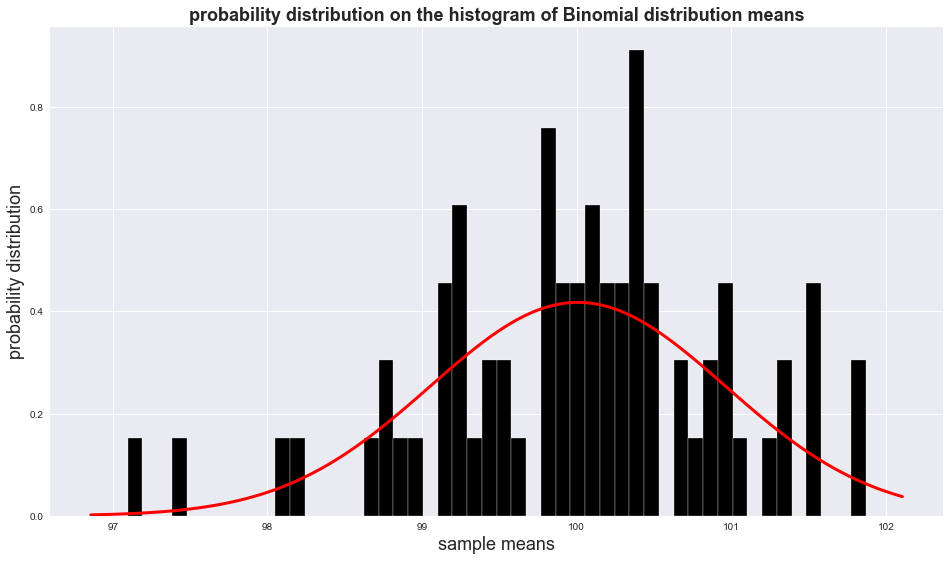

In [19]:
# Creating a histogram for all means

meansBinom = list(md['binom']['means'].values())

# Creating a mean and a standard deviation to plot the Gaussian function

meanOfMeansBinom = np.mean(meansBinom)
stdOfMeansBinom = np.std(meansBinom)

# plotting the histogram of means

pl.figure(figsize=(16, 9))
pl.hist(meansBinom, bins=50, FaceColor='black', EdgeColor='white', normed=True)

# setting up parameters of the Gaussian function 

xmin, xmax = pl.xlim()
x = np.linspace(xmin, xmax, mean)
gaussian = nm.pdf(x, meanOfMeansBinom, stdOfMeansBinom) # probability distribution function for the mean of means and
                                                      # the standard deviation of means

# plotting the Gaussian function on top of the histogram of means

pl.plot(x, gaussian, 'r', linewidth=3)
pl.xlabel('sample means', fontsize=18)
pl.ylabel('probability distribution', fontsize=18)
pl.title('probability distribution on the histogram of Binomial distribution means', fontsize=18, weight='bold')
pl.show()

## Figure 6: The figure above shows the probability distribution on the histogram of all means of Poisson distribution.

# 5. Logistic distribution

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


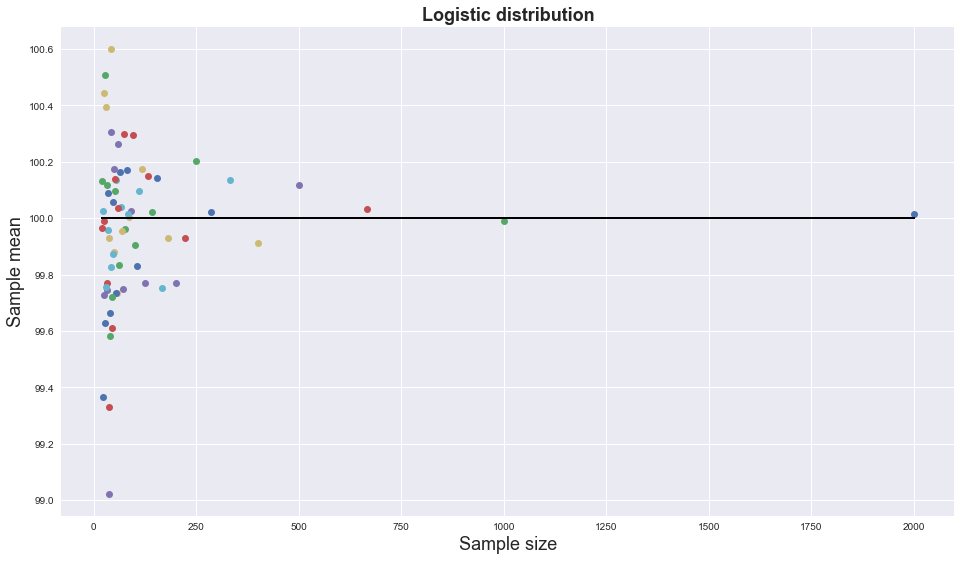

In [20]:
log = (2000 / (np.array(range(1, 100)))).astype(int)
print(log, log.shape)

md['log'] = {}

# Filling in the chi-squares

for i in pois:
    md['log'][i] = np.random.logistic(mean, size=i)

# Plotting the distribution and filling in the means

md['log']['means'] = {}
logNormN = pl.figure(figsize=(16,9)).add_subplot(111)

for nn in md['log']:
    if not type(nn) == str:
        md['log']['means'][nn] = md['log'][nn].mean()
        logNormN.plot(nn, md['log']['means'][nn], 'o')
        logNormN.set_xlabel('Sample size', fontsize=18)
        logNormN.set_ylabel('Sample mean', fontsize=18)
        logNormN.set_title('Logistic distribution', fontsize=18, weight='bold')
        logNormN.plot([min(log), max(log)], [mean, mean], 'k')

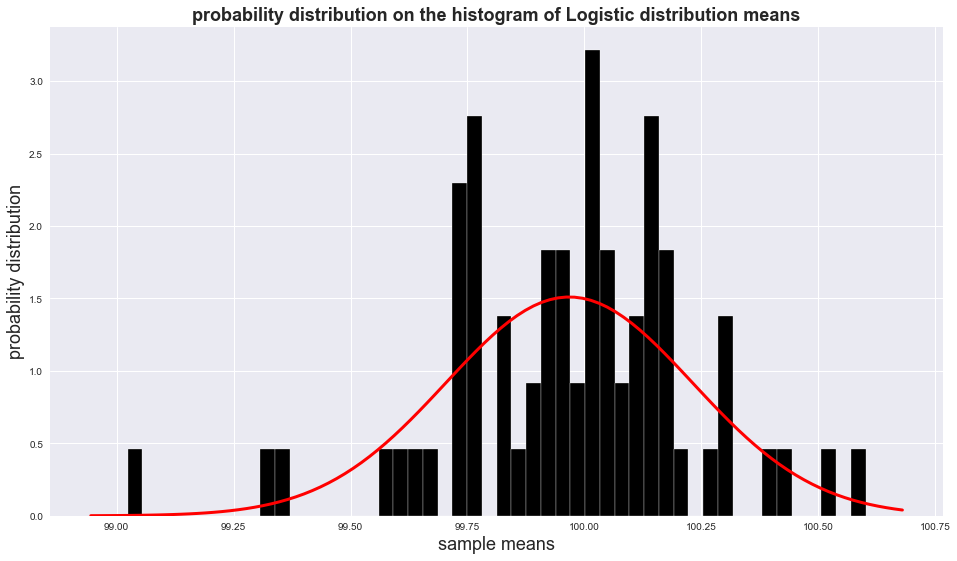

In [21]:
# Creating a histogram for all means

meansLog = list(md['log']['means'].values())

# Creating a mean and a standard deviation to plot the Gaussian function

meanOfMeansLog = np.mean(meansLog)
stdOfMeansLog = np.std(meansLog)

# plotting the histogram of means

pl.figure(figsize=(16, 9))
pl.hist(meansLog, bins=50, FaceColor='black', EdgeColor='white', normed=True)

# setting up parameters of the Gaussian function 

xmin, xmax = pl.xlim()
x = np.linspace(xmin, xmax, mean)
gaussian = nm.pdf(x, meanOfMeansLog, stdOfMeansLog) # probability distribution function for the mean of means and
                                                      # the standard deviation of means

# plotting the Gaussian function on top of the histogram of means

pl.plot(x, gaussian, 'r', linewidth=3)
pl.xlabel('sample means', fontsize=18)
pl.ylabel('probability distribution', fontsize=18)
pl.title('probability distribution on the histogram of Logistic distribution means', fontsize=18, weight='bold')
pl.show()

## Figure 7: The figure above shows the probability distribution on the histogram of all means of Logistic distribution.

# 6. HIstogram of all distributions

In [22]:
# All 5 distributions together

dist = [meansChisq, meansNorm, meansPois, meansPois, meansLog]

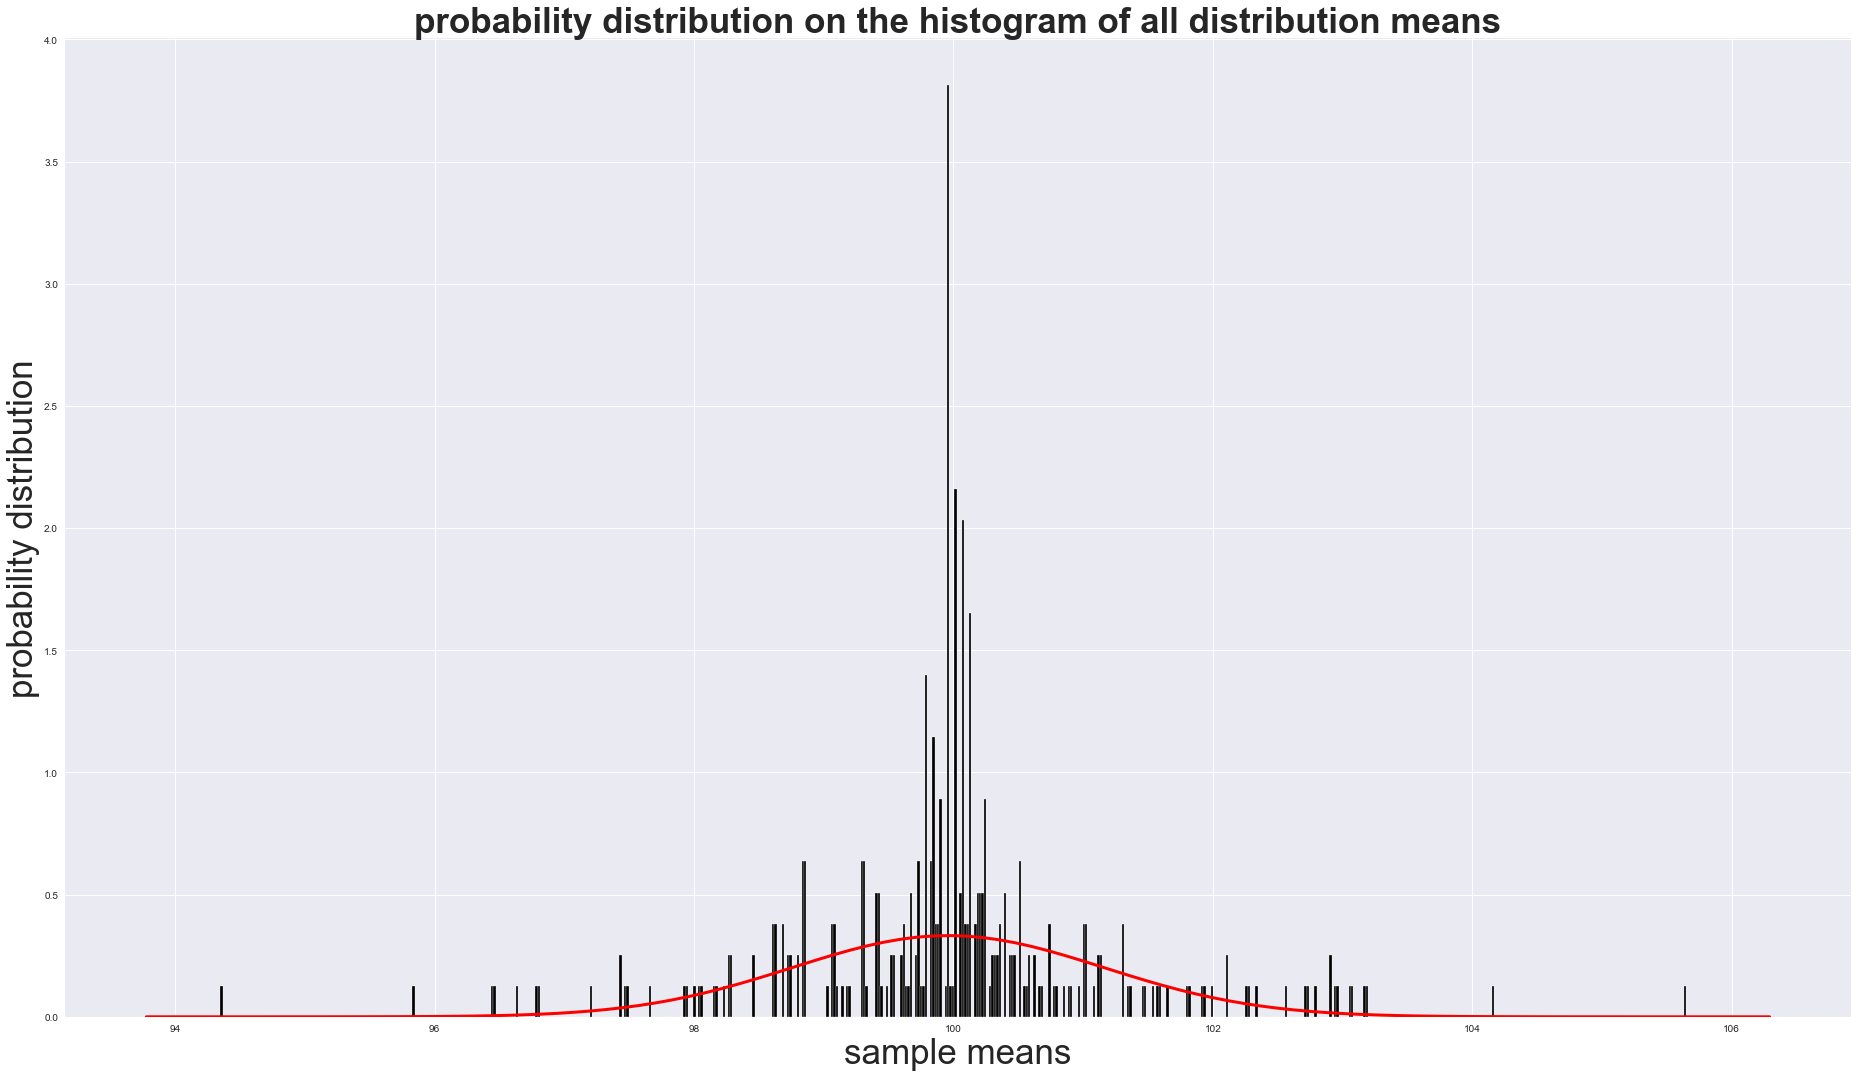

In [23]:
meanOfMeansDist = np.mean(dist)
stdOfMeansDist = np.std(dist)

# plotting the histogram of all means

pl.figure(figsize=(32, 18))
pl.hist(dist, bins=100, FaceColor='black', EdgeColor='white', normed=True)

# setting up parameters of the Gaussian function 

xmin, xmax = pl.xlim()
x = np.linspace(xmin, xmax, mean)
gaussian = nm.pdf(x, meanOfMeansDist, stdOfMeansDist)

# plotting the Gaussian function on top of the histogram of means

pl.plot(x, gaussian, 'r', linewidth=3)
pl.xlabel('sample means', fontsize=35)
pl.ylabel('probability distribution', fontsize=35)
pl.title('probability distribution on the histogram of all distribution means', fontsize=35, weight='bold')
pl.show()

## Figure 8: The figure above shows the probability distribution on the histogram of all means of all 5 distributions.